Pobranie danych i wizualizacja:

In [17]:
import requests
import tarfile
import gzip
import os
import pandas as pd

url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"
file_name = "housing.tzg"
file_csv = "housing.csv"
file_gz = "housing.csv.gz"

response = requests.get(url)
if not os.path.exists(file_name):
    with open (file_name, "wb") as file:
        file.write(response.content)
    with tarfile.open(file_name, 'r:gz') as tar:
        tar.extractall(filter='data')
    with open (file_csv, 'rb') as file:
        b_compressed_data = gzip.compress(file.read())
    with open (file_gz, 'wb') as file:
        file.write(b_compressed_data)

if os.path.exists(file_name):
    os.remove(file_name)
    os.remove(file_csv)

df = pd.read_csv(file_gz)
print(df.head(2))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  


Testowanie metod Pandas:

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [19]:
df.value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity
-124.35    40.54     52.0                1820.0       300.0           806.0       270.0       3.0147         94600.0             NEAR OCEAN         1
-118.19    34.12     35.0                2524.0       749.0           2487.0      679.0       2.4932         167700.0            <1H OCEAN          1
           34.13     52.0                2012.0       458.0           1314.0      434.0       3.9250         180400.0            <1H OCEAN          1
                     50.0                1309.0       302.0           883.0       293.0       3.1287         198000.0            <1H OCEAN          1
           34.12     52.0                679.0        132.0           483.0       163.0       4.2344         162500.0            <1H OCEAN          1
                                                                                                         

In [20]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Wizualizacja:

C:\Users\User\AppData\Local\Temp\ipykernel_37320\1052705234.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(bins=50, ax=ax1)


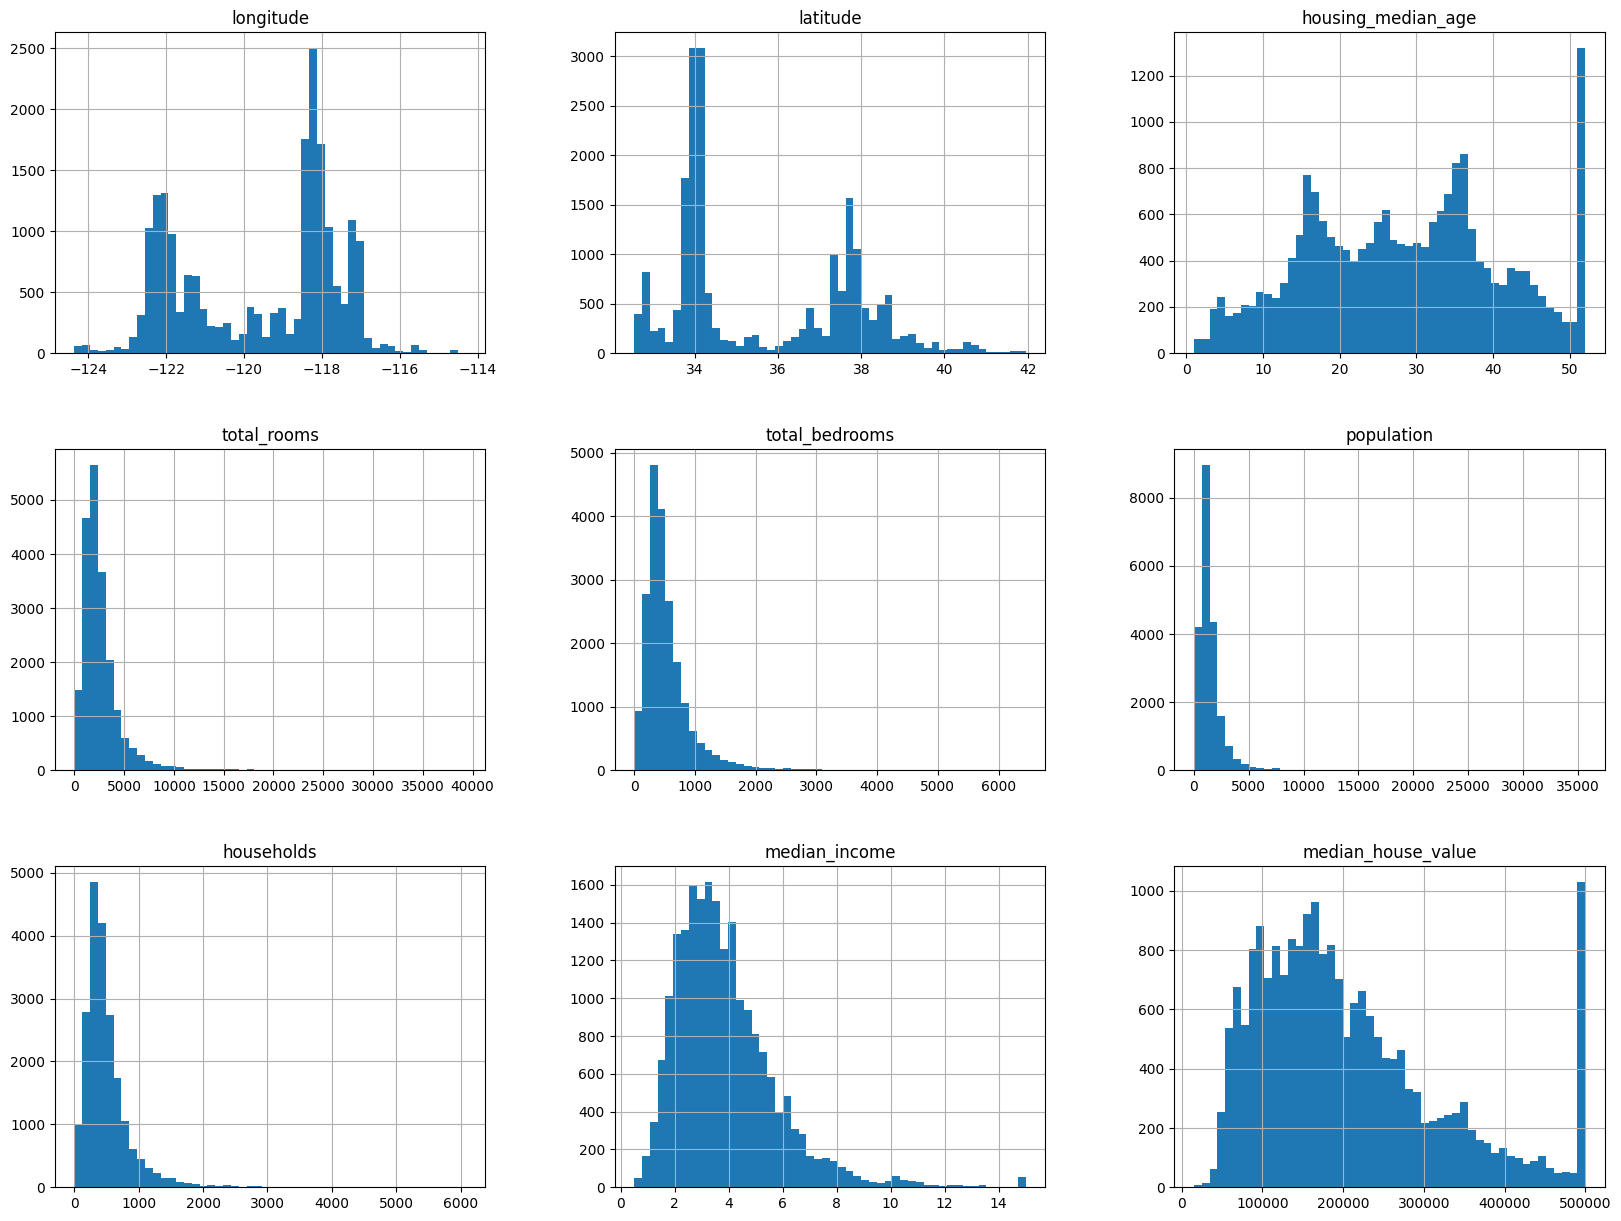

In [38]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots(figsize=(20,15))
df.hist(bins=50, ax=ax1)
fig1.savefig(fname="obraz1.png")

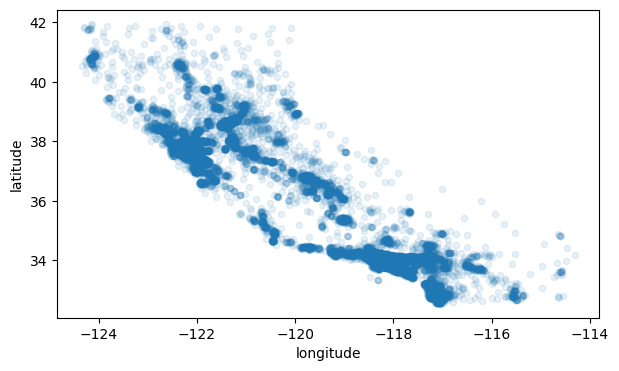

In [37]:
fig2, ax2 = plt.subplots(figsize=(7,4))
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, ax=ax2)
fig2.savefig(fname="obraz2.png")

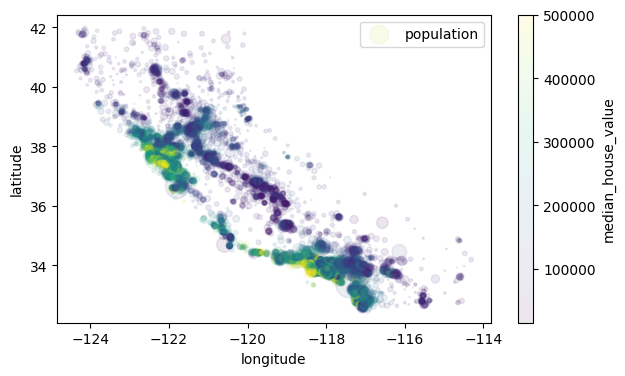

In [ ]:
fig3, ax3 = plt.subplots(figsize=(7,4))
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, ax=ax3, colorbar=True, s=df["population"]/100, label="population", c="median_house_value", cmap=plt.get_cmap('viridis'))
fig3.savefig(fname="obraz3.png")

Analiza, macierz korelacji:

In [46]:
df_encoded = pd.get_dummies(df, columns=["ocean_proximity"], dtype=float)
print(df_encoded.head(2))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     0.0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                       1.0                         0.0  
1                       1.0                         0.0  


In [90]:
corr_matrix = df_encoded.corr()["median_house_value"].sort_values(ascending=False)

korelacja = corr_matrix.reset_index().rename(columns={"index": "atrybut", "median_house_value": "wspolczynnik_korelacji"})
korelacja.to_csv("korelacja.csv", index=False)

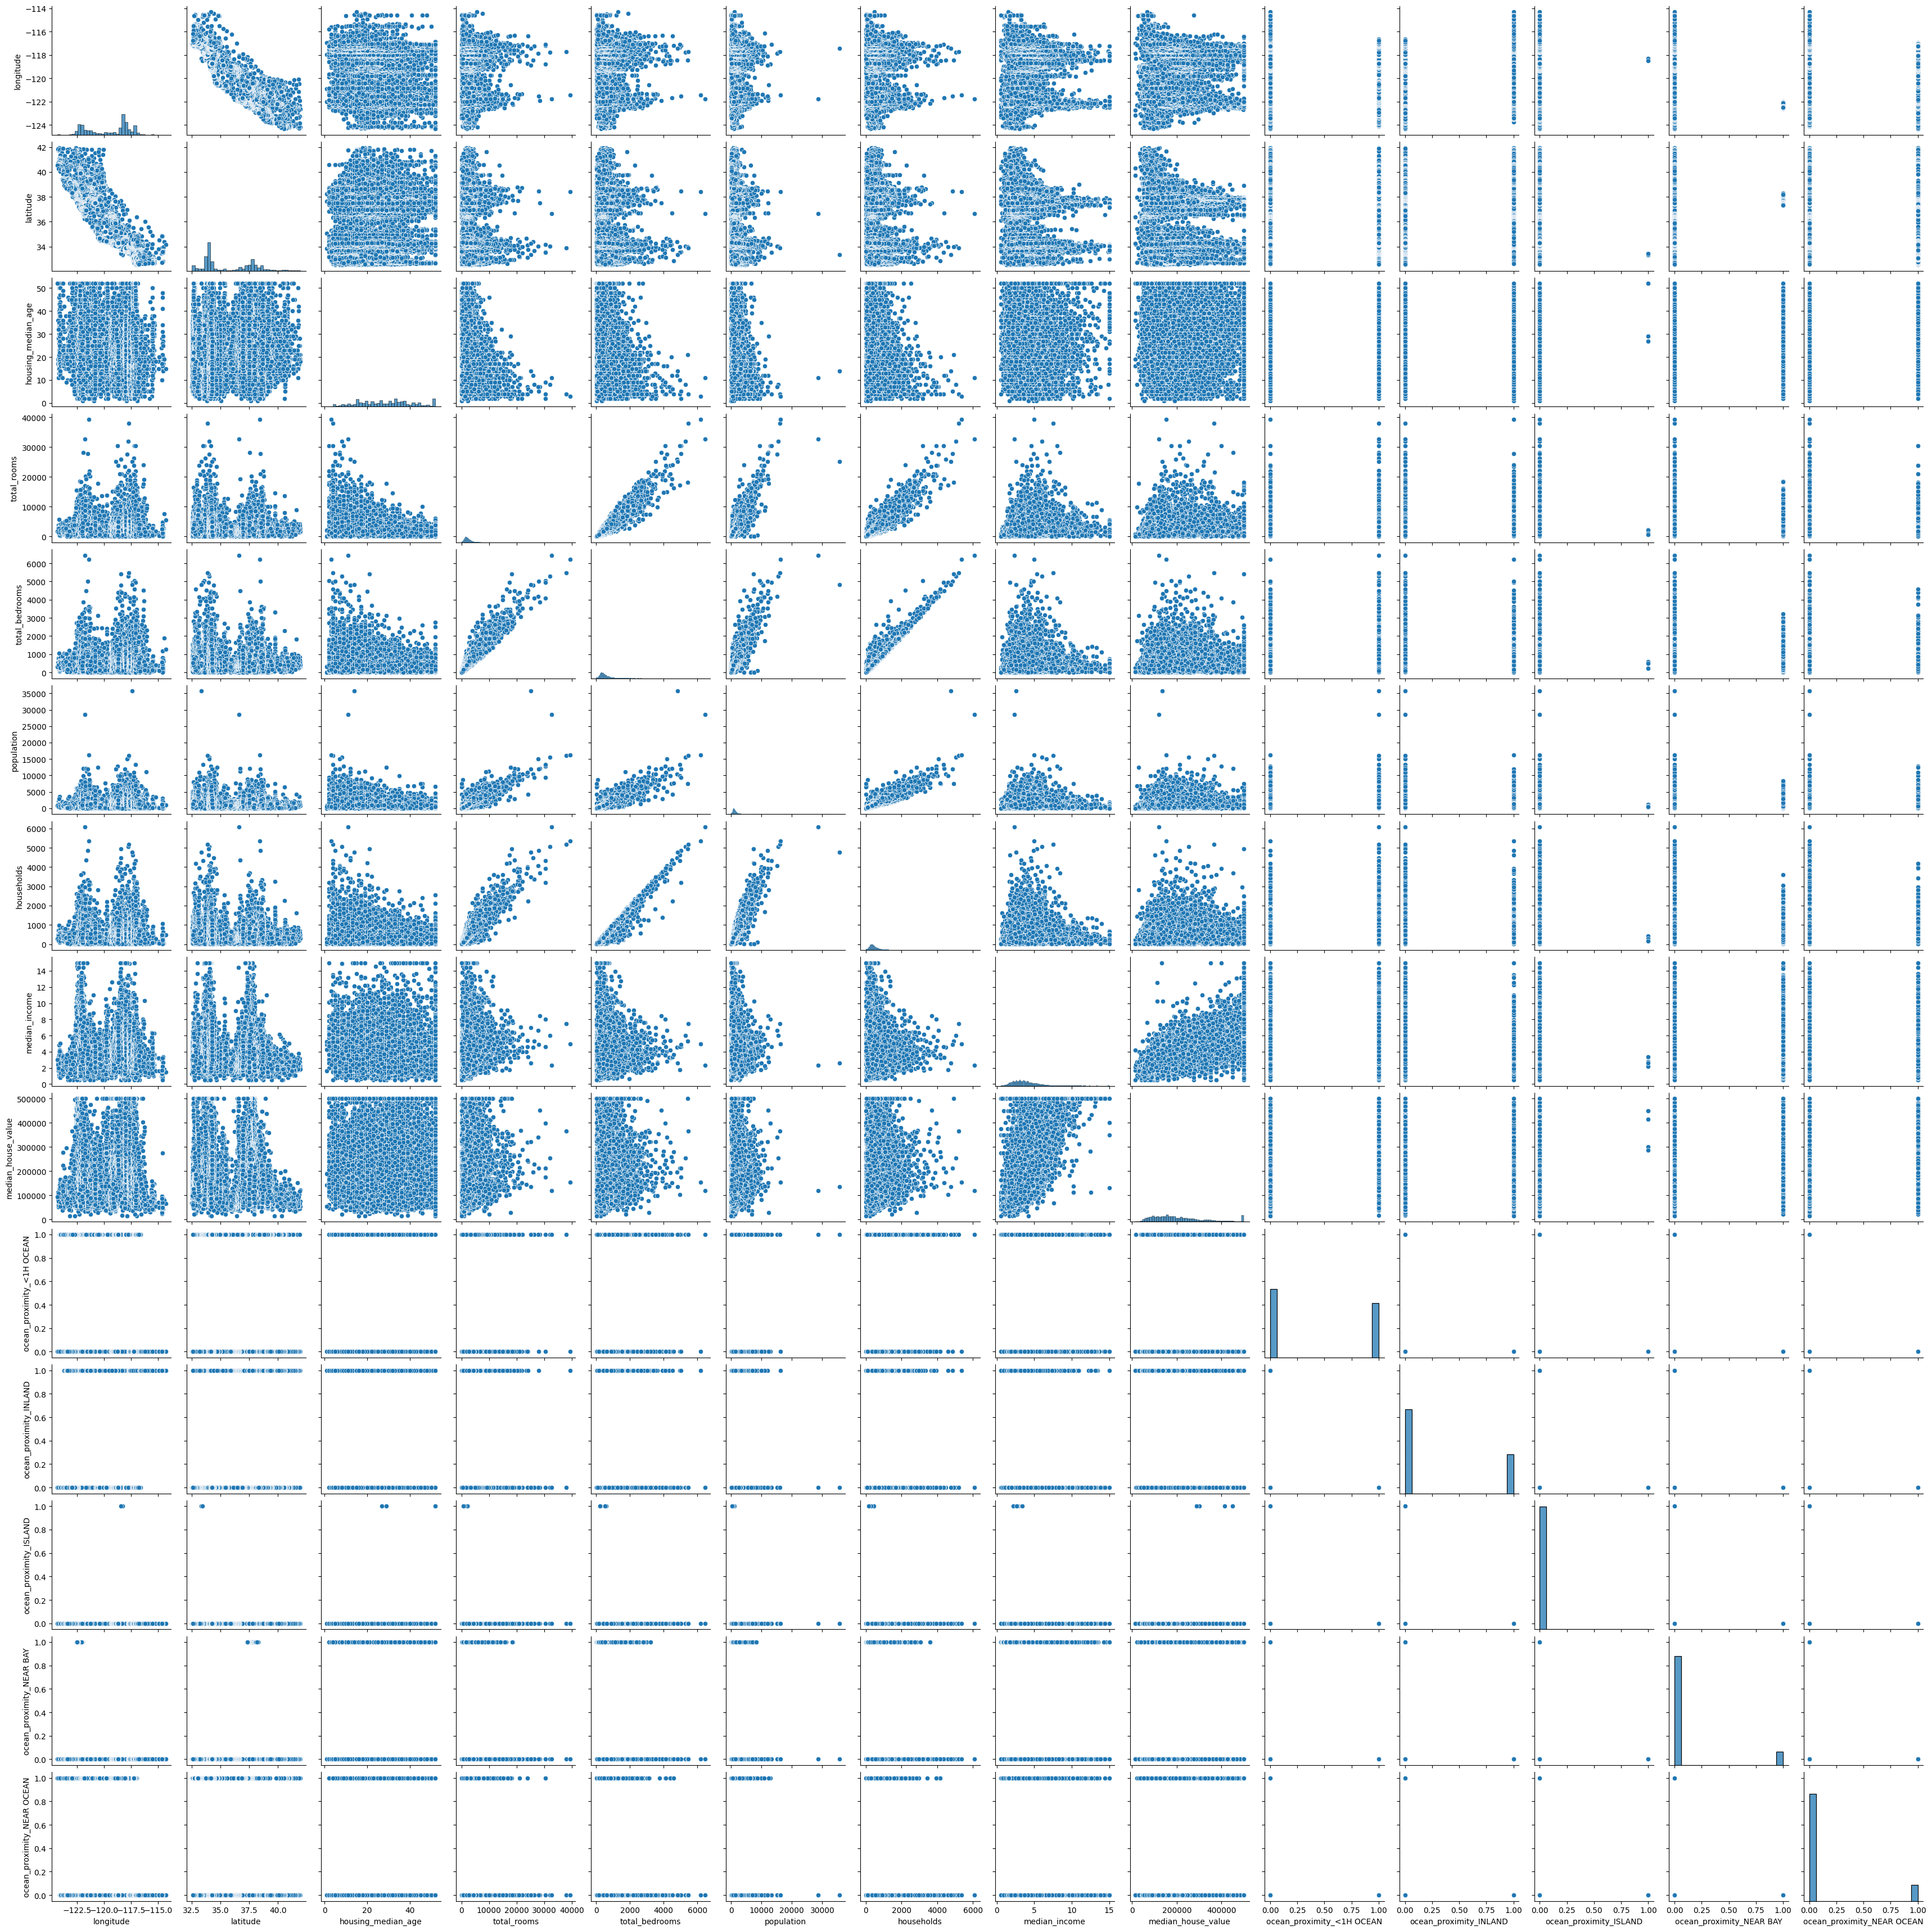

In [75]:
import seaborn as sns

sns.pairplot(df_encoded)

Przygotowanie do uczenia:

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_encoded, test_size=0.2, random_state=42)
print(len(train_data), len(test_data))
print("Train data : \n", train_data.head(10), "\n")
print("Test data : \n", test_data.head(10))

Macierze korelacji zbiorów:

In [91]:
print("Macierz korelacji całego zbioru: \n", korelacja)

corr_train = train_data.corr()["median_house_value"].sort_values(ascending=False).reset_index().rename(columns={"index":"atrybut","median_house_value":"wspolczynnik korelacji"})
print("Macierz korelacji zbioru uczącego: \n", corr_train)

corr_test = test_data.corr()["median_house_value"].sort_values(ascending=False).reset_index().rename(columns={"index":"atrybut","median_house_value":"wspolczynnik korelacji"})
print("Macierz korelacji zbioru testującego: \n", corr_test)

Macierz korelacji całego zbioru: 
                        atrybut  wspolczynnik_korelacji
0           median_house_value                1.000000
1                median_income                0.688075
2    ocean_proximity_<1H OCEAN                0.256617
3     ocean_proximity_NEAR BAY                0.160284
4   ocean_proximity_NEAR OCEAN                0.141862
5                  total_rooms                0.134153
6           housing_median_age                0.105623
7                   households                0.065843
8               total_bedrooms                0.049686
9       ocean_proximity_ISLAND                0.023416
10                  population               -0.024650
11                   longitude               -0.045967
12                    latitude               -0.144160
13      ocean_proximity_INLAND               -0.484859
Macierz korelacji zbioru uczącego: 
                        atrybut  wspolczynnik korelacji
0           median_house_value                1.

Wyniki są bardzo podobne. Oznacza to, że zbiory są do siebie zbliżone pod względem częstości występowania atrybutów (mają podobne rozkłady) i ich wzajemnych zależności.

In [ ]:
import pickle

train_file_pickle = "train_set.pkl"
test_file_pickle = "test_set.pkl"

if not os.path.exists(train_file_pickle):
    with open(train_file_pickle, "wb") as file:
        pickle.dump(train_data, file)

if not os.path.exists(test_file_pickle):
    with open(test_file_pickle, "wb") as file:
        pickle.dump(test_data, file)